#### Acknowledgement : Dataset credit goes to Zach Stednick.

In [1]:
# importing libraries
import numpy as np
import pandas as pd

#### Read train dataset

In [2]:
df = pd.read_csv(r'C:\dphi medical insurance\Train_Data (1).csv')

In [3]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494240
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
# Copy of original dataframe
train = df.copy()

In [5]:
# Dropping duplicate observations
train.drop_duplicates(inplace=True)


print(f"Number of rows duplicate rows dropped : {df.shape[0] - train.shape[0]}")

Number of rows duplicate rows dropped : 679


In [6]:
# Shape of data to be used
train.shape

(2951, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807221
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
for i in train.columns:
    print(f"No of unique values for {i} are {len(df[i].unique())}")

No of unique values for age are 1589
No of unique values for sex are 2
No of unique values for bmi are 2322
No of unique values for smoker are 2
No of unique values for region are 4
No of unique values for children are 6
No of unique values for charges are 2951


In [10]:
df['region'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

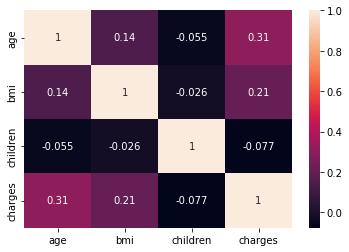

In [12]:
sns.heatmap(train.corr(), annot=True)
plt.show()

In [13]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [14]:
# Separating 'region' into 2 parts 
train['region_2'] = train['region'].apply(lambda x: str(x)[5:])

# Using ordinal encoder for categorical predictor variables
oe = OrdinalEncoder()
train[['sex', 'smoker', 'region', 'region_2']] = oe.fit_transform(train[['sex', 'smoker', 'region', 'region_2']])

# Rounding off 'age' to nearest integer reduced rmse error
train['age'] = round(train['age'])

In [15]:
#train['smokers_per_region'] = train.groupby('region')['smoker'].transform('sum')
#train['smoker_child_std'] = train.groupby('smoker')['children'].transform('std')
#train['age*bmi'] = train['age'] * train['bmi']
#train['bmi_cat_2'] = train['bmi'].apply(lambda x: 1 if x in range(18, 26) else (-1 if x < 18.5 else 0))
#train['bmi_cat'] = x        
#train['bmi/age'] = train['bmi'] * train['age']
#train['age_bin'] = np.array(np.floor(np.array(train['age']) / 10.))
#train['bmi_bin'] = np.array(np.floor(np.array(train['bmi']) / 10.))
#train['bmi'] = train['bmi']**2
#train['age'] = train['age']**2

In [16]:
train

,age,sex,bmi,smoker,region,children,charges,region_2
0,21.0,1.0,25.745000,0.0,0.0,2,3279.868550,0.0
1,37.0,0.0,25.744165,1.0,2.0,3,21454.494240,0.0
2,18.0,1.0,30.030000,0.0,2.0,1,1720.353700,0.0
3,37.0,1.0,30.676891,0.0,0.0,3,6801.437542,0.0
4,58.0,1.0,32.010000,0.0,2.0,1,11946.625900,0.0
...,...,...,...,...,...,...,...,...
2947,43.0,1.0,35.531966,1.0,2.0,2,18989.365540,0.0
2948,31.0,1.0,28.278549,0.0,0.0,4,21806.181610,0.0
2949,50.0,0.0,26.766297,0.0,1.0,4,11355.817590,1.0
2950,49.0,0.0,31.396840,0.0,1.0,4,11185.914060,1.0


In [17]:
# X is composed of predictor variables and y is our target variable
X, y = train.drop('charges', axis=1), train['charges']

In [18]:
# Splitting train and validation data set
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1999)

In [19]:
# Linear Regression model
model = LinearRegression()
model.fit(train_X, train_y)
print(f"RMSE Score for Linear Regression is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Linear Regression is :5715.294875129442


In [20]:
# Ridge Regression model
model = Ridge()
model.fit(train_X, train_y)
print(f"RMSE Score for Ridge Regression is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Ridge Regression is :5714.050026181957


In [21]:
# Lasso Regression model
model = Lasso()
model.fit(train_X, train_y)
print(f"RMSE Score for Lasso Regression is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Lasso Regression is :5715.102771336823


In [22]:
# Decision Tree model
model = DecisionTreeRegressor()
model.fit(train_X, train_y)
print(f"RMSE Score for Decision Tree is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Decision Tree is :5203.698400774947


In [23]:
# Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(train_X, train_y)
print(f"RMSE Score for Random Forest is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Random Forest is :4146.360844269262


In [24]:
# Light Gradient Boosting model
model = lgb.LGBMRegressor(learning_rate=0.05)
model.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=30, verbose=False)
print(f"RMSE Score for Light Gradient Boosting is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

RMSE Score for Light Gradient Boosting is :4080.1234867479243


In [25]:
# Extreme Gradient Boosting Model
model = xgb.XGBRegressor(learning_rate=0.05, max_depth=8, n_estimators=100000)
model.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=30, verbose=False)
print(f"RMSE Score for Xtreme Gradient Boosting is :{mean_squared_error(val_y, model.predict(val_X), squared=False)}")

[01:22:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score for Xtreme Gradient Boosting is :4057.726421589229


In [26]:
model = xgb.XGBRegressor(learning_rate=0.05, max_depth=8)
model.fit(X, y)

[01:22:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=8)

In [27]:
# Libraries to save model
import pickle
import joblib

In [28]:
# Save model and ordinal encoder object for future use
joblib.dump(model, 'C:/Flask_app/xgb_model.joblib')
joblib.dump(oe, 'C:/Flask_app/oe.joblib')

['C:/Flask_app/oe.joblib']

### From above baseline models we can see that xgboost performs best of all (in terms of least Root Mean Squared Error) so to make it perform better on test data applied 3-Fold Cross Validation on train set 

In [29]:
# Reading test data
test = pd.read_csv(r'C:\dphi medical insurance\Test_Data (1).csv')

In [30]:
# Preprocessing for test data (same as train data above)
test['region_2'] = test['region'].apply(lambda x: str(x)[5:])
test[['sex', 'smoker', 'region', 'region_2']] = oe.transform(test[['sex', 'smoker', 'region', 'region_2']])
test['age'] = round(test['age'])

In [31]:
def xgb_model(fold_seed, model_seed):
    scores = []
    splits=3
    
    oof=np.zeros(len(X))
    test_pred =np.zeros(len(test))
    
    print('***********************************************************')
    kf = KFold(n_splits=splits, shuffle=True, random_state=fold_seed)
    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        model = xgb.XGBRegressor(n_estimators=10000, learning_rate=0.05, max_depth=8, random_state=model_seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=30, eval_metric='rmse', verbose=False)
        pred = model.predict(X_val)
        oof[test_index] = pred
        score = np.sqrt(mean_squared_error(y_val, (pred)))
        
        print(f'RMSE score for fold {fold} is {score}')
        scores.append(score)
        
        test_pred += model.predict(test)
            
    print(f'\nAvg score for all folds is {np.sum(scores)/splits}')
    
    print('***********************************************************')
    print(f'\nOut Of Fold Score after completing folds is {np.sqrt(mean_squared_error(y, oof))}')
    test_df = pd.DataFrame(test_pred, columns=['prediction'])
    test_df = (test_df/splits)
    return test_df
    #print(f'\nRMSE Score for HOLDOUT Data is {np.sqrt(mean_squared_error(test_y, holdout_pred/8))}')

In [32]:
# To generalize better on unseen data using random seeds for different xgboost models
test_df_2 = xgb_model(1231, 87639)
test_df_3 = xgb_model(788, 5456)
test_df_4 = xgb_model(17, 2019465)
test_df_5 = xgb_model(9999, 22222)

***********************************************************
[01:22:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE score for fold 0 is 4098.30345753577
[01:22:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE score for fold 1 is 3925.3267256685103
[01:22:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE score for fold 2 is 3893.7986539982057

Avg score for all folds is 3972.4762790674954
***********************************************************

Out Of Fold Score after completing folds is 3973.520122161139
***********************************************************
[01:22:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE score for fold 0 is 4369.216269131298
[01:22:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is no

In [33]:
# Taking average of all predictions
test_seed_xgb = (test_df_2 + test_df_3 + test_df_4 + test_df_5) / 4

In [34]:
# Saving Predictions
test_seed_xgb.to_csv(r'C:\dphi medical insurance\submissions\submission_xgb_seed.csv', index=False)